# simple linear regression

In [1]:
# Import relevant Python libraries and modules.

### YOUR CODE HERE ###
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols


In [2]:
# Loda the seaborn built-in dataset
data = sns.load_dataset ("penguins")

In [3]:
# Display the first 10 rows of the data.

data.head()


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [4]:
# Display number of rows, number of columns.
data.shape


(344, 7)

In [5]:
# check the unique penguine species of the data
data.species.unique()

array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object)

In [6]:
# For simplicity, choose only the Adelie and Gentoo species for data analysis 
data = data[data["species"] != "Chinstrap"]

In [7]:
# Start with .isna() to get booleans indicating whether each value in the data is missing.

data.isna()


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,True,True,True,True,True
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
339,False,False,True,True,True,True,True
340,False,False,False,False,False,False,False
341,False,False,False,False,False,False,False
342,False,False,False,False,False,False,False


In [8]:
# Use .any(axis=1) to get booleans indicating whether there are any missing values along the columns in each row.

data.isna().any(axis=1)

0      False
1      False
2      False
3       True
4      False
       ...  
339     True
340    False
341    False
342    False
343    False
Length: 276, dtype: bool

In [9]:
# Use .sum() to get the number of rows that contain missing values.

data.isna().any(axis=1).sum()

11

In [29]:
# Use .dropna(axis=0) to indicate that you want rows which contain missing values to be dropped. 
# To update the DataFrame, reassign it to the result. By default, it doesn't change the original dataframe in place

data=data.dropna()

In [30]:
data.isna().sum()

species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

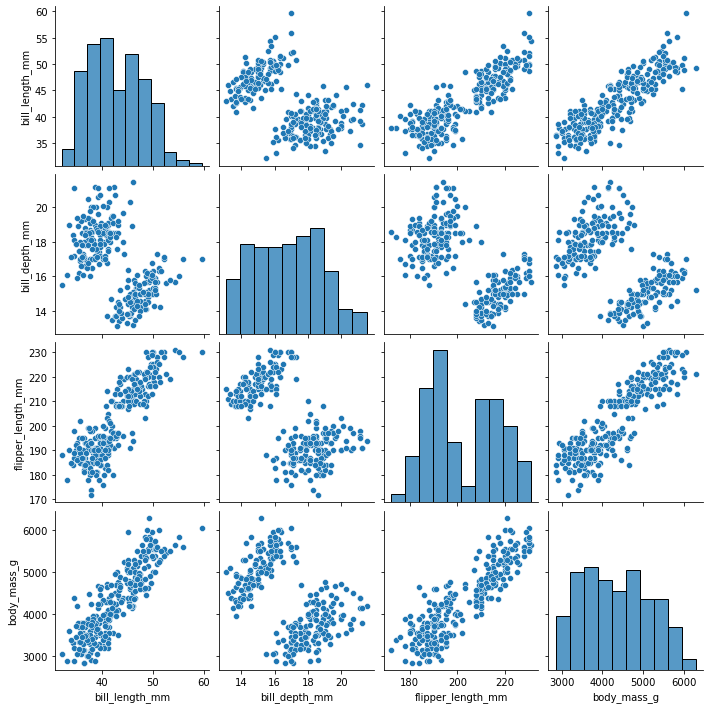

In [31]:
# Create plot of pairwise relationships.


sns.pairplot(data)

In [33]:
# Select relevant columns.
# Save resulting DataFrame in a separate variable to prepare for regression.

ols_data=data[["body_mass_g","bill_length_mm"]]

In [34]:
# Display first 10 rows of the new DataFrame.

ols_data.head()

,body_mass_g,bill_length_mm
0,3750.0,39.1
1,3800.0,39.5
2,3250.0,40.3
4,3450.0,36.7
5,3650.0,39.3


In [35]:
# Write the linear regression formula.
# Save it in a variable.

ols_formula="body_mass_g ~ bill_length_mm"

In [37]:
# Implement OLS.

OLS=ols(formula=ols_formula, data=ols_data)


In [ ]:
# Fit the model to the data.
# Save the fitted model in a variable.

model=OLS.fit()

In [38]:
# Get summary of results.

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            body_mass_g   R-squared:                       0.769
Model:                            OLS   Adj. R-squared:                  0.768
Method:                 Least Squares   F-statistic:                     874.3
Date:                Thu, 08 Aug 2024   Prob (F-statistic):           1.33e-85
Time:                        11:19:55   Log-Likelihood:                -1965.8
No. Observations:                 265   AIC:                             3936.
Df Residuals:                     263   BIC:                             3943.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept      -1707.2919    205.640     -8.302      0.000   -2112.202   -1302.382
bill_length_mm   141.1904      4.775     29.569      0.000     131.788     150.592
==============================================================================
Omnibus:                        2.060   Durbin-Watson:                   2.067
Prob(Omnibus):                  0.357   Jarque-Bera (JB):                2.103
Skew:                           0.210   Prob(JB):                        0.349
Kurtosis:                       2.882   Cond. No.                         357.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

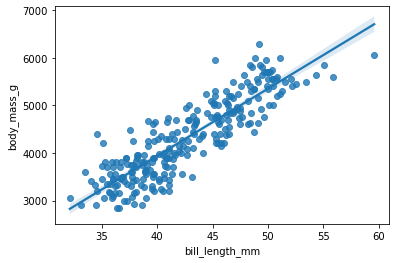

In [41]:
# Plot the OLS data with the best fit regression line.

# note here the x and y should correspond with column names in data
sns.regplot(x="bill_length_mm", y="body_mass_g", data=ols_data)

In [43]:
# Get the residuals from the model.

residuals=model.resid

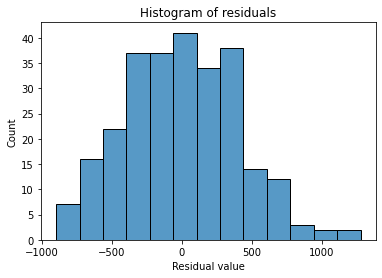

In [48]:
# Visualize the distribution of the residuals.

fig=sns.histplot(residuals)
fig.set_xlabel("Residual value")
fig.set_title("Histogram of residuals")
plt.show()

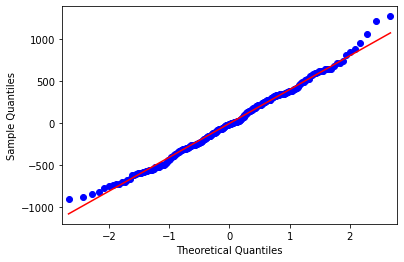

In [51]:
# Create a Q-Q plot.

fig=sm.qqplot(residuals, line="s")

In [53]:
# Get fitted values.

fitted_values=model.predict(ols_data["bill_length_mm"])

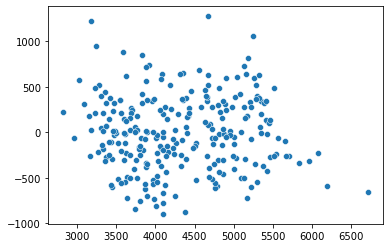

In [56]:
# Create a scatterplot of residuals against fitted values.


sns.scatterplot(y=residuals, x=fitted_values)